In [10]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

import numpy as np
import os, sys
import PIL
import PIL.Image

In [11]:
os.getcwd()

'c:\\Users\\xyang\\OneDrive\\Escritorio\\ARCHIVOS\\THEBRIDGE\\Data-Science-Bootcamp-21\\ENTREGABLES\\COMPETITION\\HAPPY'

In [12]:
batch_size = 32 # Entrena de 32 en 32
img_height = 180
img_width = 180

data_dir = os.getcwd() + os.sep + "train"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,# Si quitamos estos tres de abajo, cogería toda la carpeta para el conjunto de training
  subset="training", # 
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6176 files belonging to 2 classes.
Using 4941 files for training.
Found 6176 files belonging to 2 classes.
Using 1235 files for validation.


In [13]:
len(train_ds.class_names)

2

In [14]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

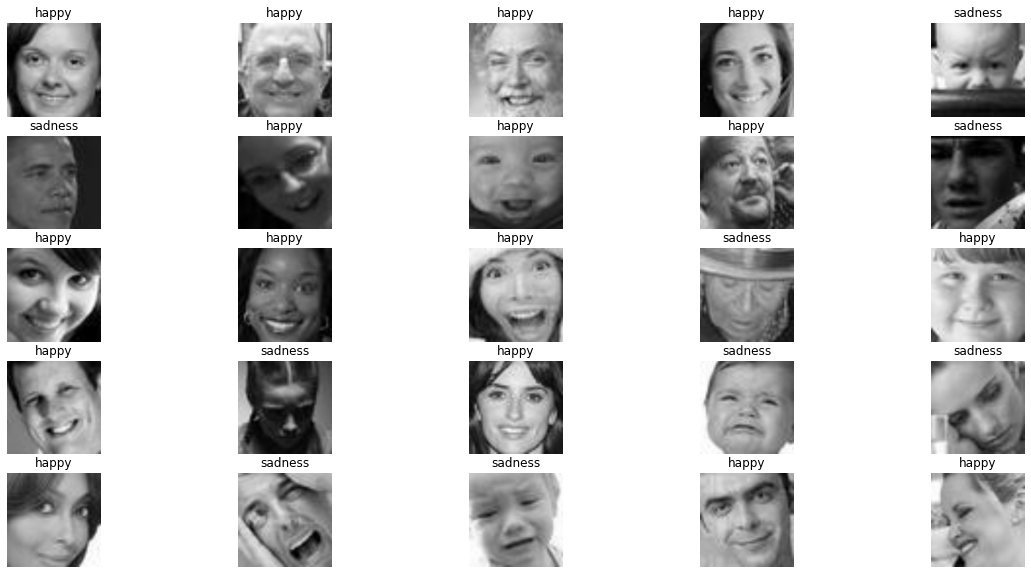

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
model = Sequential()

#adding convo-pool layers
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(180, 180, 3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# flattening image
model.add(Flatten())

# adding dense layers
model.add(Dense(128,activation='relu'))
# adding dropout to minimize overfitting issue
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=["accuracy"])

#summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 259200)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               33177728  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                6450      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)               

In [18]:
"""model = keras.Sequential([
    keras.layers.Conv2D(filters=8,  # nº de neuronas
                        kernel_size=(3, 3), 
                        input_shape=(180, 180, 3), 
                        padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), # Preprocesamiento/Te lo transforma a vector
    keras.layers.Dense(128, activation='relu'), # Una capa con 128 neuronas
    keras.layers.Dense(3, activation="softmax") # Una capa con 2 neuronas porque hay dos clases
])
model.summary()"""

'model = keras.Sequential([\n    keras.layers.Conv2D(filters=8,  # nº de neuronas\n                        kernel_size=(3, 3), \n                        input_shape=(180, 180, 3), \n                        padding=\'same\'),\n    keras.layers.MaxPooling2D(pool_size=(2, 2), \n                              padding="same"),\n    keras.layers.Dropout(0.25),\n    keras.layers.Flatten(), # Preprocesamiento/Te lo transforma a vector\n    keras.layers.Dense(128, activation=\'relu\'), # Una capa con 128 neuronas\n    keras.layers.Dense(3, activation="softmax") # Una capa con 2 neuronas porque hay dos clases\n])\nmodel.summary()'

In [19]:
"""model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])"""

"model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])"

In [20]:
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [21]:
"""model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 10
                    )"""

'model.fit(train_ds,\n                    validation_data = val_ds,\n                    epochs = 10\n                    )'

In [22]:
model.fit(train_ds,validation_data=val_ds,epochs=3,callbacks=[early_stop],verbose=True)

Epoch 1/3
155/155 [==============================] - 57s 367ms/step - loss: 101.7801 - accuracy: 0.5064 - val_loss: 0.7000 - val_accuracy: 0.5247
Epoch 2/3
155/155 [==============================] - 54s 348ms/step - loss: 0.7008 - accuracy: 0.5552 - val_loss: 0.6984 - val_accuracy: 0.5466
Epoch 3/3
155/155 [==============================] - 55s 352ms/step - loss: 0.6872 - accuracy: 0.5582 - val_loss: 0.6942 - val_accuracy: 0.5595


In [29]:
dire = os.path.dirname(os.getcwd()) + os.sep + "HAPPY"+ os.sep + "test"

In [30]:
def read_data(path):
    X = []

    for file in os.listdir(path):
        image = cv2.imread(path + '/' + file, flags=cv2.IMREAD_COLOR)
        smallimage = cv2.resize(image, (180, 180))
        
        X.append(smallimage)

    return np.array(X)
    

x_test = read_data(dire)

# Procesar las imagenes tal y como entran en el modelo
x_test = preprocess_input(x_test)
print(x_test.shape)

(4117, 180, 180, 3)


In [38]:
from sklearn.metrics import accuracy_score
pred = model.predict_classes(x_test)

In [39]:
preds[:6]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [40]:
lista = []

for i in range(len(preds)):
    x = np.argmax(preds[i])
    lista.append(x)

type(lista)

list

In [41]:
set(lista)

{0}

In [34]:
h_s = []

for x in lista:
    s = train_ds.class_names[x]
    h_s.append(s)

set(h_s)

{'happy'}